In [24]:
import os
import cv2
import time
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.layers as tfl
from tensorflow.keras.models import Sequential

In [2]:
Classes = ['ana', 'ath', 'ba', 'bha', 'cha', 'char', 'chha', 'chhyya', 'da', 'dda', 'ddha', 'dha', 'dui', 'ek', 'ga', 'gha', 'gya', 'ha', 'ja', 'jha', 'ka', 'kha',
           'kna', 'la', 'ma', 'na', 'nau', 'pa', 'pach', 'pha', 'ra', 'sat', 'sha1', 'sha2', 'sha3', 'sunya', 'ta', 'tha', 'tin', 'tra', 'tta', 'ttha', 'wo', 'xa', 'ya', 'yan']

In [3]:
data = []
Datadirectory = "dataset/Train"
def create_data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                data.append([img_array,class_num])
            except Exception as e:
                pass

In [4]:
create_data()

In [5]:
print(len(data))

78200


In [6]:
random.shuffle(data)

In [7]:
X = []
Y = []

for features,label in data:
    X.append(features)
    Y.append(label)

In [8]:
X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(78200, 32, 32)
(78200,)


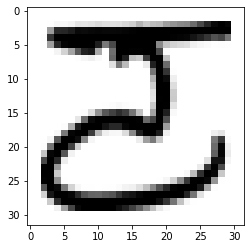

In [9]:
plt.imshow(X[0],cmap=plt.cm.binary)

In [10]:
X = tf.keras.utils.normalize(X,axis=1)

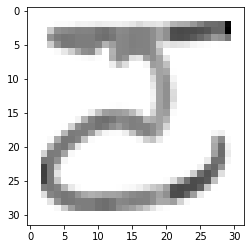

In [11]:
plt.imshow(X[0],cmap = plt.cm.binary)

In [12]:
print(Y[0])
print(Classes[Y[0]])

36
ta


In [13]:
IMG_SIZE = 32
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print(X.shape)

(78200, 32, 32, 1)


In [21]:
model = Sequential([
    tfl.Conv2D(filters= 32 ,kernel_size =3,input_shape = X.shape[1:]),
    tfl.ReLU(),
    tfl.Conv2D(filters= 32 ,kernel_size =3),
    tfl.ReLU(),
    tfl.MaxPool2D(),
    tfl.Dropout(0.25),
    
    tfl.Conv2D(filters= 64 ,kernel_size =3),
    tfl.ReLU(),
    tfl.Conv2D(filters= 64 ,kernel_size =3),
    tfl.ReLU(),
    tfl.MaxPool2D(),
    tfl.Dropout(0.25),
    
    tfl.Flatten(),
    tfl.Dense(256,activation='relu'),
    tfl.Dropout(0.5),
    tfl.Dense(46,activation='softmax')  
])

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 re_lu_7 (ReLU)              (None, 30, 30, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 re_lu_8 (ReLU)              (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0         
                                                      

In [23]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [25]:
start = time.time()
model.fit(X,Y,epochs=10,validation_split=0.2,batch_size=64)
end = time.time()
print("Training time: ",(end-start)/60,"min")

Epoch 1/10
978/978 [==============================] - 144s 146ms/step - loss: 1.1468 - accuracy: 0.6749 - val_loss: 0.2487 - val_accuracy: 0.9246
Epoch 2/10
978/978 [==============================] - 151s 154ms/step - loss: 0.3779 - accuracy: 0.8851 - val_loss: 0.1390 - val_accuracy: 0.9582
Epoch 3/10
978/978 [==============================] - 152s 155ms/step - loss: 0.2600 - accuracy: 0.9191 - val_loss: 0.1102 - val_accuracy: 0.9654
Epoch 4/10
978/978 [==============================] - 145s 148ms/step - loss: 0.2054 - accuracy: 0.9362 - val_loss: 0.0875 - val_accuracy: 0.9746
Epoch 5/10
978/978 [==============================] - 153s 156ms/step - loss: 0.1675 - accuracy: 0.9468 - val_loss: 0.0762 - val_accuracy: 0.9770
Epoch 6/10
978/978 [==============================] - 152s 156ms/step - loss: 0.1469 - accuracy: 0.9530 - val_loss: 0.0693 - val_accuracy: 0.9807
Epoch 7/10
978/978 [==============================] - 149s 152ms/step - loss: 0.1272 - accuracy: 0.9593 - val_loss: 0.0670 -